In [1]:
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
 
 
# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
 
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
 
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [2]:
# Compute a PCA 
n_components = 70
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
 
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [3]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.49335591
Validation score: 0.565217
Iteration 2, loss = 1.16605857
Validation score: 0.565217
Iteration 3, loss = 0.96361975
Validation score: 0.608696
Iteration 4, loss = 0.78697382
Validation score: 0.753623
Iteration 5, loss = 0.64123323
Validation score: 0.797101
Iteration 6, loss = 0.53188737
Validation score: 0.811594
Iteration 7, loss = 0.44511668
Validation score: 0.826087
Iteration 8, loss = 0.37598471
Validation score: 0.840580
Iteration 9, loss = 0.31739472
Validation score: 0.840580
Iteration 10, loss = 0.26969968
Validation score: 0.840580
Iteration 11, loss = 0.23146148
Validation score: 0.840580
Iteration 12, loss = 0.19924407
Validation score: 0.855072
Iteration 13, loss = 0.17235406
Validation score: 0.855072
Iteration 14, loss = 0.15025208
Validation score: 0.869565
Iteration 15, loss = 0.13188383
Validation score: 0.869565
Iteration 16, loss = 0.11629077
Validation score: 0.869565
Iteration 17, loss = 0

In [4]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.92      0.86      0.89       109
  Donald Rumsfeld       0.80      0.76      0.78        37
    George W Bush       0.85      0.97      0.90       202
Gerhard Schroeder       0.80      0.74      0.77        43
       Tony Blair       0.88      0.66      0.75        65

         accuracy                           0.86       456
        macro avg       0.85      0.80      0.82       456
     weighted avg       0.86      0.86      0.86       456



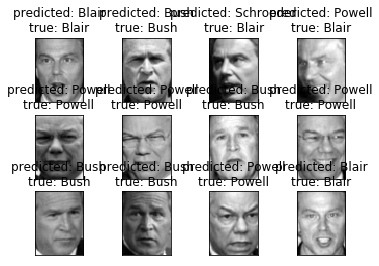

In [6]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)

prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)

The essence of eigenfaces is an unsupervised dimensionality reduction algorithm called Principal Components Analysis (PCA) 
that we use to reduce the dimensionality of images into something smaller. 
Now that we have a smaller representation of our faces, 
we apply a classifier that takes the reduced-dimension input and produces a class label. 
For our classifier, we used a single-layer neural network.
These represent the “generic” faces of our dataset. 
Intuitively, these are vectors that represent directions in “face space” and are 
what our neural network uses to help with classification. Now that we’ve discussed the eigenfaces approach, 
you can build applications that use this face recognition algorithm!